
This post is the first in a series in which we'll use a simple but effective mathematical
model to predict the ongoing Coronavirus outbreak.  As I write, the number of official
confirmed global cases is just under 200,000 and most of the world has enacted fairly drastic and
unprecedented measures to try to slow its spread.

In television and movies, math is often used to predict things like the behavior of a specific
individual; math is a terrible tool for that kind of thing (indeed, math tells us that such things
are inherently unpredictable).  But math is quite good at predicting the average behavior of large
groups, and a little math can go a long way in telling us what will happen next with COVID-19.

*Disclaimer*: I am not an epidemiologist and I make no guarantees about the predictions
we'll arrive at here.  By reading this you agree not to sue me.  What I write here does
not reflect the opinion of my employer or anyone else.  My goal is simply to show you how
some relatively straightforward mathematics can give you insight into what appears to be
a very uncertain future.


# Modeling the spread of infectious disease

An infectious disease spreads from one individual to another.  Consider the following simple model:

  - On day zero, a single individual is infected
  - On each subsequent day, each infected individual passes the disease to one more individual
  
How quickly does the number of infected individuals grow?

1, 2, 4, 8, 16, ...

On each day, the number of infected doubles!  How many days would it take for everyone on earth to be infected?

This is not a reasonable model for any of the diseases we know of.  Of course, the rate of new infections per infected person (1 per day) was an arbitrary choice and real values are likely to be smaller.  What other effects are missing from this model?

  - **Recovery and immunity**: eventually, an individual recovers and can no longer infect others
  - **Spread**: The infection can only spread to people who don't yet have it.  If most of the individuals in contact with an infected person are already infected, that person is less likely to spread the disease to someone new

Those two factors are vital to understanding the true dynamics of epidemics.  Of course, there are many other important details we have left out; for instance:

  - The disease may affect different individuals in different ways.
  - Individuals are spread out geographically.
  - Certain individuals are likely to infect many others, while others are less likely.  This depends on many factors including culture, personality, and lifestyle, as well as the mode of transmission of the disease.
  - Individuals might take actions to avoid getting infected (e.g. washing hands, avoiding sick people) or to avoid spreading the disease (e.g. staying home when sick).
  
All of these effects (and many others) will influence the spread of the disease.  A model that tries to incorporate them all would be very complex.

## The SIR model

One of the simplest but most relevant models is based on the idea that the population consists of three groups:

  - **S(t)** Susceptible (those who have not yet been infected)
  - **I(t)** Infected (those who can currently spread the disease)
  - **R(t)** Recovered (those who are now immune and cannot contract or spread the disease)

This model takes the form of three ODEs -- one for each group.  The idea is that susceptible people can become infected and infected people can become recovered:

$$ S \to I \to R$$

To define ODEs for the three groups, we only need to determine the rate at which each of these transitions occurs.


### Rate of infection

In our first simple model, we assumed the rate of infection was proportional to the number of infected.  This is very reasonable, but for someone new to become infected we need both an infected individual **and** a susceptible one.  If we imagine that people encounter each other randomly at some rate $\beta$, then the rate of new infections is just the number of infected multiplied by the probability of encountering a susceptible individual:

$$
\frac{dI}{dt} = \beta I \frac{S}{N}.
$$

Here $N=S+I+R$ is the total population, so $S/N$ is the probability that a randomly chosen individual is susceptible.

Of course, since new infected people were previously susceptible, the number of susceptible individuals must decrease at the same rate:

$$
\frac{dS}{dt} = -\beta I \frac{S}{N}.
$$

### Rate of recovery

The other transition is from infected to recovered.  A proper model for this should involve a time delay, since (for many diseases) new infected individuals typically become recovered after a certain interval of time.  For instance, with the flu or the new Coronavirus, the number of new recovered individuals might depend on how many became infected about one or two weeks ago.  Incorporating such an effect would lead to a more complicated model known as a **delay differential equation**.

Instead, we will simply assume that over any time interval, a certain fraction of the infected become recovered.  Denoting the recovery rate by $\gamma$, we have

$$
\frac{dR}{dt} = \gamma I.
$$

The number of infected must decrease at the same rate, so we must modify our ODE for $I(t)$ to read

$$
\frac{dI}{dt} = \beta I \frac{S}{N}-\gamma I.
$$

### The full model

\begin{align}
\frac{dS}{dt} & = -\beta I \frac{S}{N} \\
\frac{dI}{dt} & = \beta I \frac{S}{N}-\gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align}

Notice that if we add the 3 equations together, we get 

$$
\frac{dN}{dt} = 0.
$$

What do $\beta$ and $\gamma$ really mean?  We can think of $\beta$ as the number of others that one infected person encounters per unit time, and $\gamma^{-1}$ as the typical time from infection to recovery.  So the number of new infections generated by one infected individual is, on average, $$\beta/\gamma = R_0,$$ the **basic reproduction number**.

### SIR dynamics

Notice that $S(t)$ can only decrease and $R(t)$ can only increase, but $I(t)$ may increase or decrease.  A key question is, under what conditions will $I(t)$ increase?  This will tell us whether a small number of cases could become an epidemic.

We can write

$$
\frac{dI}{dt} = \left(\beta \frac{S}{N}-\gamma \right) I
$$

from which we see that $I(t)$ grows if 
$$\beta S/N > \gamma.$$

$$
\frac{dI}{dt} = \left(\beta \frac{S}{N}-\gamma \right) I
$$

Initially in a population we have 
$$S/N \approx 1,$$

so an epidemic of some size can occur if $\beta > \gamma$.  As the epidemic grows, the ratio $S/N$ becomes smaller, so eventually the spread slows down.

What fraction of the population must been infected before $I(t)$ will start to decrease?

The epidemic will begin to subside when 
$$S/N = (\beta/\gamma)^{-1} = R_0^{-1}.$$

This determines the infection peak.  After this point, there will still be new infections but the overall number of infected will decrease.

## An example
So what does an epidemic look like, using the SIR model?

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
plt.style.use('seaborn-poster')

3.696349000435225e-05


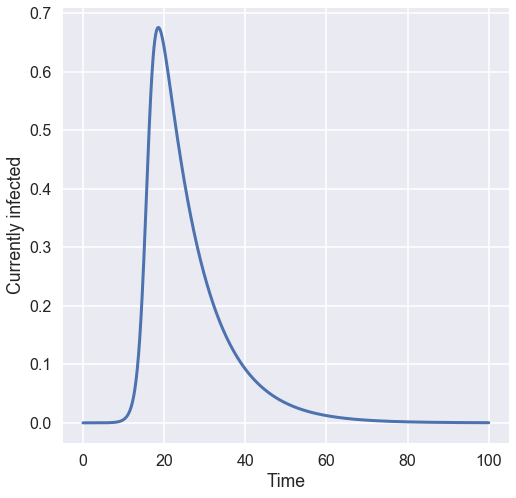

In [27]:
beta = 1.0
gamma = 0.1
N = 1.

# Initial values

R = [0]
I = [1.e-6]
S = [N - I[0] - R[0]]

def change(S,I,R):
    S_change = -beta*I*S/N
    I_change = beta*I*S/N - gamma*I
    R_change = gamma*I
    return S_change, I_change, R_change


T = 100
dt = 0.1
times = np.linspace(0,T,int(T/dt)+1)

for t in times[1:]:
    S_change, I_change, R_change = change(S[-1],I[-1],R[-1])
    I.append(I[-1]+delta_t*I_change)
    S.append(S[-1]+delta_t*S_change)
    R.append(R[-1]+delta_t*R_change)

plt.figure(figsize=(8,8))
plt.plot(times,I,lw=3);
plt.xlabel('Time')
plt.ylabel('Currently infected')

In [20]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']
